In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!head 11-12_force.csv

,/ACF/telem/force
1630993378.1155696,-10.0
1630993383.4162107,-10.0
1630993396.461548,-10.100000381469727
1630993396.4934843,-4.800000190734863
1630993396.5416863,19.700000762939453
1630993396.5936322,25.200000762939453
1630993396.6417477,25.600000381469727
1630993396.6935449,26.100000381469727
1630993396.741945,25.799999237060547


In [6]:
data = np.loadtxt("11-12_force.csv", delimiter=",", skiprows=1)
data

array([[ 1.63099338e+09, -1.00000000e+01],
       [ 1.63099338e+09, -1.00000000e+01],
       [ 1.63099340e+09, -1.01000004e+01],
       ...,
       [ 1.63099351e+09,  2.61000004e+01],
       [ 1.63099351e+09,  2.61000004e+01],
       [ 1.63099351e+09,  2.63999996e+01]])

In [8]:
t = data[:,0]
force = data[:,1]
t

array([1.63099338e+09, 1.63099338e+09, 1.63099340e+09, ...,
       1.63099351e+09, 1.63099351e+09, 1.63099351e+09])

In [9]:
t = t - t[0]
t

array([  0.        ,   5.30064106,  18.3459785 , ..., 135.12995982,
       135.17822385, 135.23330331])

In [10]:
plt.plot(t, force)

In [12]:
mask = (t > 40) & (t < 60)
mask

array([False, False, False, ..., False, False, False])

In [13]:
t = t[mask]
force = force[mask]

In [14]:
plt.plot(t, force)

In [16]:
dt = np.mean(np.diff(t))
dt

0.04999916714833195

In [17]:
x_test = np.array([1, 2, 4, 3])
np.diff(x_test)

array([ 1,  2, -1])

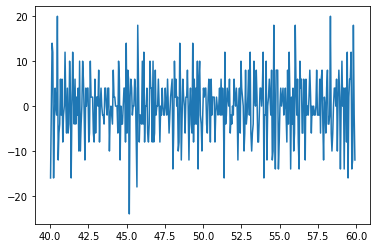

In [20]:
force_deriv = np.diff(force) / dt
plt.plot(t[:-1], force_deriv)

In [21]:
F = np.fft.fft(force)

In [22]:
omega = np.fft.fftfreq(force.size, d=dt)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


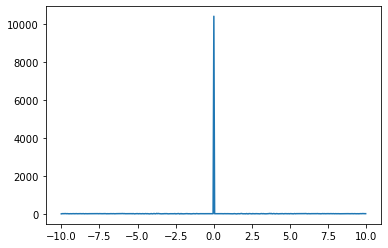

In [23]:
order = omega.argsort()
plt.plot(omega[order], F[order])

In [24]:
F_deriv = 1j * omega * F

In [25]:
force_deriv_fft = np.fft.ifft(F_deriv)

In [26]:
plt.plot(t, force_deriv_fft)

In [27]:
omega

array([  0.        ,   0.05000083,   0.10000167,   0.1500025 ,
         0.20000333,   0.25000416,   0.300005  ,   0.35000583,
         0.40000666,   0.4500075 ,   0.50000833,   0.55000916,
         0.60000999,   0.65001083,   0.70001166,   0.75001249,
         0.80001333,   0.85001416,   0.90001499,   0.95001582,
         1.00001666,   1.05001749,   1.10001832,   1.15001916,
         1.20001999,   1.25002082,   1.30002165,   1.35002249,
         1.40002332,   1.45002415,   1.50002499,   1.55002582,
         1.60002665,   1.65002748,   1.70002832,   1.75002915,
         1.80002998,   1.85003082,   1.90003165,   1.95003248,
         2.00003331,   2.05003415,   2.10003498,   2.15003581,
         2.20003665,   2.25003748,   2.30003831,   2.35003914,
         2.40003998,   2.45004081,   2.50004164,   2.55004248,
         2.60004331,   2.65004414,   2.70004497,   2.75004581,
         2.80004664,   2.85004747,   2.90004831,   2.95004914,
         3.00004997,   3.0500508 ,   3.10005164,   3.15

In [33]:
F_filtered = F.copy()
F_filtered[np.abs(omega) > 2] = 0
F_filtered

array([ 1.04005000e+04+0.00000000e+00j, -6.70929279e-02+1.22079499e+00j,
        5.23534078e-01+3.97880499e-01j, -8.98204887e-02-6.45731955e-03j,
       -1.01399557e+00-1.38889177e+00j, -2.37504698e+00-7.33815732e-01j,
        8.36699981e-01+1.50743014e-01j,  1.23266994e+00+9.19743142e-01j,
        6.91740082e-01+4.76431788e-01j,  4.36127139e-01+7.03885125e-01j,
        1.13172201e+00+4.89567856e-01j, -1.06234339e+00+1.62628498e+00j,
       -1.15541423e-01-1.06431113e+00j, -1.85043774e+00-2.10234656e-01j,
        2.24515248e+00-8.54714483e-02j, -9.03285100e-01-1.87601321e+00j,
       -1.02881871e+00-1.66314963e+00j,  1.60959999e+00-1.33394013e+00j,
        1.03556652e+00-4.37318416e-02j,  1.01267086e+00+9.34119840e-01j,
       -3.74818832e+00+3.75098792e+00j, -9.01605265e-01+1.31874914e+00j,
        3.61865981e+00+4.42391412e+00j,  6.70374814e+00-1.44799984e+00j,
       -4.66316451e+00+1.56641350e+00j, -5.34637363e+00-2.20220652e+00j,
        1.68469447e+00+1.56115556e+00j,  3.96083611

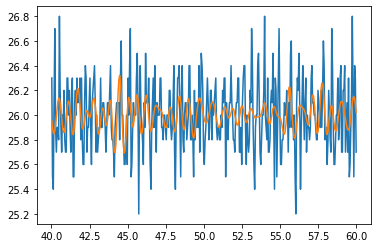

In [34]:
plt.plot(t, force)
plt.plot(t, np.fft.ifft(F_filtered))

In [36]:
F_filtered_deriv = 1j * omega * F_filtered
plt.plot(t, force_deriv_fft)
plt.plot(t, np.fft.ifft(F_filtered_deriv))